<a href="https://colab.research.google.com/github/krishnasidhvi/Capstone_DATA606/blob/main/number_plate_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.4/496.4 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 10.1 MB/s eta 0:00:00


In [2]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow


Download data

In [3]:
!curl -L "https://public.roboflow.com/ds/Fvu9AlEvjv?key=TdHG7wYWk4" > roboflow.zip 
!unzip roboflow.zip 
!rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   894  100   894    0     0   3072      0 --:--:-- --:--:-- --:--:--  3072
100 10.2M  100 10.2M    0     0  15.0M      0 --:--:-- --:--:-- --:--:-- 55.6M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/b15d6c0bdf90226d_jpg.rf.775557ba6aaf7d76a8d4bb04f66d8fc5.jpg  
 extracting: test/images/b193070a9c45b5ab_jpg.rf.57e5987eb896a7bf9fc7a1a96a660c7e.jpg  
 extracting: test/images/b1a50a3824887ee2_jpg.rf.68a4fd34fce20184287592f2680f895b.jpg  
 extracting: test/images/b25d7d2cb7abf86b_jpg.rf.36edce738b0e69965e001035d6f85ab3.jpg  
 extracting: test/images/b32671b7cc279583_jpg.rf.f898026e2169a3b6adc4d21aee6d06c5.jpg  
 extracting: test/images/b3b61da98e22cd4a_jpg.rf.e5f31065702d6

Loading images into numpy arrays

In [4]:
image_array = [] 
for img_file in os.listdir('./train/images/'):
  
  img = cv2.imread('./train/images/'+img_file)
  image_array.append(img)

Show first five images

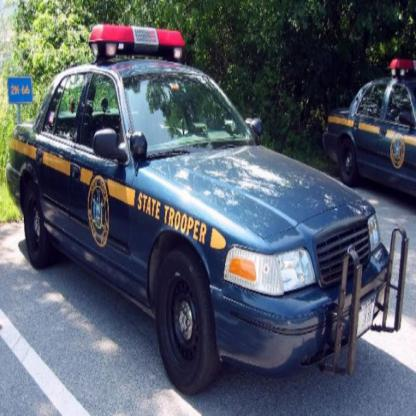

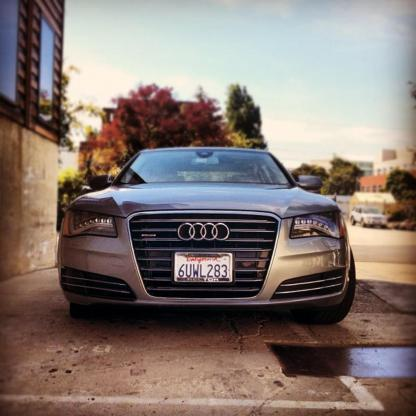

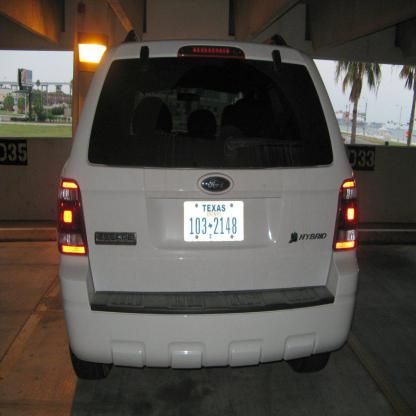

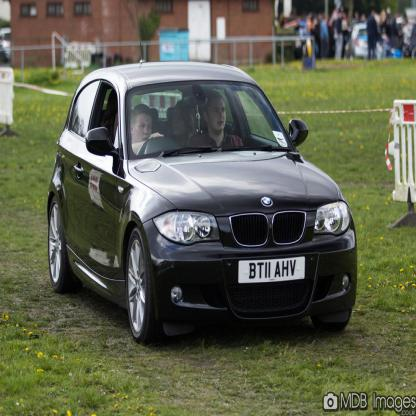

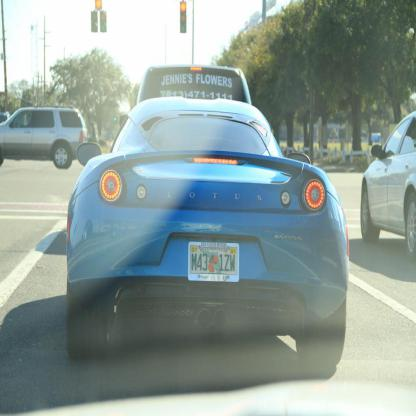

In [5]:
for i in range(5):
  cv2_imshow(image_array[i])

Preprocessing : resize

In [6]:
def resize_all_images(imaage_array, size = [640,640] ):
  image_array_resized = []
  for img in image_array:
    image_array_resized = cv2.resize(img, size)
  return image_array_resized

In [7]:
image_array_resized = resize_all_images(image_array)

Apply yolo number plate detection

In [8]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  

model.train(data="data.yaml", epochs=3)  


  0%|          | 0.00/6.23M [00:00<?, ?B/s]

Ultralytics YOLOv8.0.51 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, wor

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

In [9]:
metrics = model.val()  
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
success = model.export(format="onnx")  

Ultralytics YOLOv8.0.51 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/valid/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:21<00:00,  4.26s/it]
                   all         70        218      0.618      0.437      0.661      0.501
         license-plate         70         84          1     0.0165      0.679      0.497
               vehicle         70        134      0.236      0.858      0.643      0.505
Speed: 2.7ms preprocess, 263.1ms inference, 0.0ms loss, 22.4ms postprocess per image
Results saved to runs/detect/val



  0%|          | 0.00/476k [00:00<?, ?B/s]

image 1/1 /content/bus.jpg: 640x480 (no detections), 172.0ms
Speed: 1.0ms preprocess, 172.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.0.51 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU

PyTorch: starting from runs/detect/train/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.9 MB)
requirements: YOLOv8 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6

requirements: 1 package updated per ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect




In [10]:
results = model("/content/train/images/003a5aaf6d17c917_jpg.rf.60e9d14047fc5cd445db13a7bb7264d4.jpg")


image 1/1 /content/train/images/003a5aaf6d17c917_jpg.rf.60e9d14047fc5cd445db13a7bb7264d4.jpg: 640x640 (no detections), 217.9ms
Speed: 1.4ms preprocess, 217.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


In [11]:
results

[{ '_keys': <generator object Results.__init__.<locals>.<genexpr> at 0x7f14b740df90>,
   'boxes': ultralytics.yolo.engine.results.Boxes
 type:  torch.Tensor
 shape: torch.Size([0, 6])
 dtype: torch.float32
 tensor([], size=(0, 6)),
   'masks': None,
   'names': {0: 'license-plate', 1: 'vehicle'},
   'orig_img': array([[[254, 248, 249],
         [252, 247, 246],
         [224, 219, 218],
         ...,
         [210, 213, 217],
         [210, 213, 217],
         [209, 212, 216]],
 
        [[255, 254, 255],
         [251, 246, 245],
         [243, 238, 235],
         ...,
         [211, 214, 218],
         [211, 214, 218],
         [210, 213, 217]],
 
        [[255, 255, 254],
         [249, 245, 244],
         [255, 252, 248],
         ...,
         [214, 215, 219],
         [214, 215, 219],
         [214, 215, 219]],
 
        ...,
 
        [[ 97, 132, 188],
         [103, 141, 195],
         [108, 148, 201],
         ...,
         [144, 157, 173],
         [141, 155, 173],
         [

In [12]:
inputs = image_array[5]
results = model(inputs)  # List of Results objects

for result in results:
    print(result.boxes)


0: 640x640 (no detections), 227.3ms
Speed: 2.0ms preprocess, 227.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


tensor([], size=(0, 6))
